# Scoring report
## Gather scores

In [1]:
import pandas as pd
import os
from constants import TASK_MODEL_PATH, TOKENIZER_SUFFIXES, MOLNET_DIRECTORY, PROJECT_PATH, DESCRIPTORS, PLOT_PATH, TASK_PATH
import scipy
from copy import copy
from typing import Dict
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
from utils import parse_tokenizer, compute_zscore

pd.set_option('display.max_rows', 500)

def read_weak_molnet_score_file(file_path:Path):
    with open(file_path, "r") as f:
            lines = [line.strip() for line in f.readlines()]
    if "REGRESSION_TEST_RESULTS!!" in lines:
        return {"rectified_mean_squared_error": float(lines[lines.index("REGRESSION_TEST_RESULTS!!")+1])}
    elif "CLASSIFICATION_TEST_RESULTS!!" in lines:
        return {"ROC_AUC": float(lines[lines.index("CLASSIFICATION_TEST_RESULTS!!")+1])}
    else:
        raise Exception(f"Filepath not found {file_path}")

classification_scores = []
regression_scores = []
for tokenizer_suffix in TOKENIZER_SUFFIXES:
    for task in MOLNET_DIRECTORY.keys():
        for model in ["bart", "roberta"]:
            task_tokenizer_path = TASK_MODEL_PATH/task/(tokenizer_suffix+"_"+model)
            print(task_tokenizer_path)
            if task_tokenizer_path.exists():
                for hyperparameter_path in glob(str(task_tokenizer_path) + "/*", recursive=True):
                    scores_path = hyperparameter_path+"/scores.csv"
                    if not Path(scores_path).is_file() or not "seed" in str(scores_path):
                        continue
                    print(scores_path)
                    new_score_df = pd.read_csv(scores_path)
                    if list(new_score_df.task_type)[0] == "classification":
                        classification_scores.append(new_score_df)
                    else:
                        regression_scores.append(new_score_df)
regression_scores = pd.concat(regression_scores, axis = 0, sort = False)
classification_scores = pd.concat(classification_scores, axis = 0, sort = False)

/home/jgut/miniconda3/envs/SMILES_OR_SELFIES/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/jgut/miniconda3/envs/SMILES_OR_SELFIES/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_bart
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_bart/5e-05_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_bart/5e-05_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_bart/5e-05_0.2_seed_2/scores.csv
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_bart/5e-05_0.2_seed_3/scores.csv
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_bart/5e-05_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_roberta
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_roberta/5e-06_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_roberta/5e-06_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_roberta/5e-06_0.2_seed_2/scores.csv
/data2/jgut/SoS_models/bace_classification/smiles_atom_isomers_roberta/5e-06_0.2_see

/data2/jgut/SoS_models/clearance/smiles_atom_standard_roberta/5e-06_0.2_seed_2/scores.csv
/data2/jgut/SoS_models/clearance/smiles_atom_standard_roberta/5e-06_0.2_seed_3/scores.csv
/data2/jgut/SoS_models/clearance/smiles_atom_standard_roberta/5e-06_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/clintox/smiles_atom_standard_bart
/data2/jgut/SoS_models/clintox/smiles_atom_standard_bart/5e-05_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/clintox/smiles_atom_standard_bart/5e-05_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/clintox/smiles_atom_standard_bart/5e-05_0.2_seed_2/scores.csv
/data2/jgut/SoS_models/clintox/smiles_atom_standard_bart/5e-05_0.2_seed_3/scores.csv
/data2/jgut/SoS_models/clintox/smiles_atom_standard_bart/5e-05_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/clintox/smiles_atom_standard_roberta
/data2/jgut/SoS_models/clintox/smiles_atom_standard_roberta/1e-05_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/clintox/smiles_atom_standard_roberta/1e-05_0.2_seed_1/scores.csv
/data2/jgut/

/data2/jgut/SoS_models/clearance/smiles_trained_standard_roberta/5e-05_0.2_seed_3/scores.csv
/data2/jgut/SoS_models/clearance/smiles_trained_standard_roberta/5e-05_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/clintox/smiles_trained_standard_bart
/data2/jgut/SoS_models/clintox/smiles_trained_standard_bart/5e-06_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/clintox/smiles_trained_standard_bart/5e-06_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/clintox/smiles_trained_standard_bart/5e-06_0.2_seed_2/scores.csv
/data2/jgut/SoS_models/clintox/smiles_trained_standard_bart/5e-06_0.2_seed_3/scores.csv
/data2/jgut/SoS_models/clintox/smiles_trained_standard_bart/5e-06_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/clintox/smiles_trained_standard_roberta
/data2/jgut/SoS_models/clintox/smiles_trained_standard_roberta/5e-05_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/clintox/smiles_trained_standard_roberta/5e-05_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/clintox/smiles_trained_standard_roberta/5e-05_

/data2/jgut/SoS_models/clintox/selfies_atom_standard_bart/5e-06_0.2_seed_3/scores.csv
/data2/jgut/SoS_models/clintox/selfies_atom_standard_bart/5e-06_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/clintox/selfies_atom_standard_roberta
/data2/jgut/SoS_models/clintox/selfies_atom_standard_roberta/5e-05_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/clintox/selfies_atom_standard_roberta/5e-05_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/clintox/selfies_atom_standard_roberta/5e-05_0.2_seed_2/scores.csv
/data2/jgut/SoS_models/clintox/selfies_atom_standard_roberta/5e-05_0.2_seed_3/scores.csv
/data2/jgut/SoS_models/clintox/selfies_atom_standard_roberta/5e-05_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/delaney/selfies_atom_standard_bart
/data2/jgut/SoS_models/delaney/selfies_atom_standard_bart/1e-05_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/delaney/selfies_atom_standard_bart/1e-05_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/delaney/selfies_atom_standard_bart/1e-05_0.2_seed_2/scores.csv
/data2

/data2/jgut/SoS_models/clintox/selfies_trained_standard_roberta/5e-06_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_bart
/data2/jgut/SoS_models/delaney/selfies_trained_standard_bart/1e-05_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_bart/1e-05_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_bart/1e-05_0.2_seed_2/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_bart/1e-05_0.2_seed_3/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_bart/1e-05_0.2_seed_4/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_roberta
/data2/jgut/SoS_models/delaney/selfies_trained_standard_roberta/5e-06_0.2_seed_0/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_roberta/5e-06_0.2_seed_1/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_roberta/5e-06_0.2_seed_2/scores.csv
/data2/jgut/SoS_models/delaney/selfies_trained_standard_robert

In [2]:
classification_scores

,Unnamed: 0,task,task_type,embedding,tokenizer,dataset,architecture,learning_rate,dropout,seed,ROC_AUC,average_precision,F1_score,accuracy_score
0,0,bace_classification,classification,smiles,atom,isomers,bart,0.000050,0.2,0,0.861051,0.914170,0.740741,0.723684
0,0,bace_classification,classification,smiles,atom,isomers,bart,0.000050,0.2,1,0.809420,0.850083,0.783626,0.756579
0,0,bace_classification,classification,smiles,atom,isomers,bart,0.000050,0.2,2,0.826630,0.880225,0.800000,0.743421
0,0,bace_classification,classification,smiles,atom,isomers,bart,0.000050,0.2,3,0.831522,0.869846,0.809302,0.730263
0,0,bace_classification,classification,smiles,atom,isomers,bart,0.000050,0.2,4,0.791667,0.841870,0.777778,0.736842
0,0,bace_classification,classification,smiles,atom,isomers,roberta,0.000005,0.2,0,0.616848,0.747825,0.724138,0.578947
0,0,bace_classification,classification,smiles,atom,isomers,roberta,0.000005,0.2,1,0.725362,0.812739,0.693182,0.644737
0,0,bace_classification,classification,smiles,atom,isomers,roberta,0.000005,0.2,2,0.754529,0.835517,0.541353,0.598684
0,0,bace_classification,classification,smiles,atom,isomers,roberta,0.000005,0.2,3,0.672645,0.784291,0.649351,0.644737
0,0,bace_classification,classification,smiles,atom,isomers,roberta,0.000005,0.2,4,0.735145,0.820694,0.604317,0.638158


## Most drilled down regression scores

In [3]:
regression_score_columns = ["rectified_mean_squared_error"]
regression_pivot = regression_scores.pivot_table(values=regression_score_columns, index=["embedding","tokenizer","dataset","architecture", "seed"],columns=["task"])
scaling_stats = {}
for metric in regression_score_columns:
    for task in regression_scores.task.unique():
        regression_pivot[f"z_{metric}_{task}"] = compute_zscore(regression_pivot[metric][task])
        if metric == "rectified_mean_squared_error":
            scaling_stats[task] = (regression_pivot[metric][task].mean(), regression_pivot[metric][task].std())
regression_pivot

rectified_mean_squared_error  \
task                                                        bace_regression   
embedding tokenizer dataset  architecture seed                                
selfies   atom      isomers  bart         0                        0.867640   
                                          1                        0.766853   
                                          2                        0.840789   
                                          3                        0.787273   
                                          4                        1.125730   
                             roberta      0                        1.273632   
                                          1                        0.909233   
                                          2                        1.161970   
                                          3                        1.211683   
                                          4                        1.237530   
                    standard bart         0                        1.168866   
                                          1                        0.779775   
                                          2                        0.762166   
                                          3                        0.821160   
                                          4                        0.732206   
                             roberta      0                        1.242868   
                                          1                        1.225243   
                                          2                        0.776240   
                                          3                        0.835992   
                                          4                        1.225987   
          trained   isomers  bart         0                        1.094915   
                                          1                        1.107150   
                                          2                        1.325104   
                                          3                        1.084281   
                                          4                        1.193118   
                             roberta      0                        0.792596   
                                          1                        0.831032   
                                          2                        0.904313   
                                          3                        1.203126   
                                          4                        0.778719   
                    standard bart         0                        1.146895   
                                          1                        0.870793   
                                          2                        0.930218   
                                          3                        0.967492   
                                          4                        1.281114   
                             roberta      0                        0.926161   
                                          1                        0.824731   
                                          2                        0.849218   
                                          3                        0.945388   
                                          4                        0.912304   
smiles    atom      isomers  bart         0                        0.801891   
                                          1                        0.847840   
                                          2                        0.794942   
                                          3                        0.798707   
                                          4                        0.964426   
                             roberta      0                        1.218710   
                                          1                        1.123317   
                                          2                        1.044592   
                  

In [4]:
regression_cols = ["embedding","tokenizer","dataset","architecture", "z_rectified_mean_squared_error_clearance","z_rectified_mean_squared_error_delaney","z_rectified_mean_squared_error_lipo"]
z_df = regression_pivot.groupby(regression_cols[:4]).agg("mean")[regression_cols[4:]]
# https://iopscience.iop.org/article/10.1088/2632-2153/ac3ffb
chemformer_best_rmse = {"Clearance": 1.230, "Delaney": 0.633, "Lipo": 0.598}
molbert_best_rmse = {"Clearance": 0.948, "Delaney": 0.531, "Lipo": 0.561}
z_df

z_rectified_mean_squared_error_clearance  \
task                                                                                 
embedding tokenizer dataset  architecture                                            
selfies   atom      isomers  bart                                        -0.584487   
                             roberta                                      0.880342   
                    standard bart                                        -0.170258   
                             roberta                                      0.139583   
          trained   isomers  bart                                        -0.301958   
                             roberta                                      0.260561   
                    standard bart                                         0.921672   
                             roberta                                      0.895104   
smiles    atom      isomers  bart                                        -0.841603   
                             roberta                                      0.308057   
                    standard bart                                        -0.177510   
                             roberta                                     -0.369582   
          trained   isomers  bart                                        -0.353675   
                             roberta                                      0.671705   
                    standard bart                                        -1.043210   
                             roberta                                     -0.234739   

                                          z_rectified_mean_squared_error_delaney  \
task                                                                               
embedding tokenizer dataset  architecture                                          
selfies   atom      isomers  bart                                       1.297594   
                             roberta                                   -0.675092   
                    standard bart                                       1.882725   
                             roberta                                   -1.186816   
          trained   isomers  bart                                      -0.129224   
                             roberta                                   -0.017686   
                    standard bart                                       0.304876   
                             roberta                                   -0.018145   
smiles    atom      isomers  bart                                       0.138867   
                             roberta                                   -1.119985   
                    standard bart                                      -1.125470   
                             roberta                                   -0.903376   
          trained   isomers  bart                                       0.734860   
                             roberta                                    0.081790   
                    standard bart                                       0.845550   
                             roberta                                   -0.110466   

                                          z_rectified_mean_squared_error_lipo  
task                                                                           
embedding tokenizer dataset  architecture                                      
selfies   atom      isomers  bart                                    0.114841  
                             roberta                                 1.084326  
                    standard bart                                   -0.628770  
                             roberta                                -0.152132  
          trained   isomers  bart                                   -0.871093  
                             roberta                                 1.183682  
                    standard bart                                    0.237943  
          

In [5]:
interesting_rows = [('selfies','atom','standard','bart'), ('selfies', 'atom','standard','roberta'), ('smiles', 'atom','standard','roberta'),('smiles', 'atom','standard','bart'), ('smiles', 'trained','standard','roberta'), ('smiles', 'atom','isomers','roberta')]
interesting_rows_regression = interesting_rows
z_df_vals = z_df.mean(axis=1).values
print(z_df.mean(axis=1).to_latex(float_format="%.2f"))
print(z_df.to_latex(float_format="%.2f"))

\begin{tabular}{llllr}
\toprule
       &         &          &         &     0 \\
embedding & tokenizer & dataset & architecture &       \\
\midrule
selfies & atom & isomers & bart &  0.28 \\
       &         &          & roberta &  0.43 \\
       &         & standard & bart &  0.36 \\
       &         &          & roberta & -0.40 \\
       & trained & isomers & bart & -0.43 \\
       &         &          & roberta &  0.48 \\
       &         & standard & bart &  0.49 \\
       &         &          & roberta &  0.87 \\
smiles & atom & isomers & bart & -0.51 \\
       &         &          & roberta & -0.54 \\
       &         & standard & bart & -0.65 \\
       &         &          & roberta & -0.90 \\
       & trained & isomers & bart &  0.03 \\
       &         &          & roberta &  0.51 \\
       &         & standard & bart & -0.06 \\
       &         &          & roberta &  0.04 \\
\bottomrule
\end{tabular}

\begin{tabular}{llllrrr}
\toprule
       &         &          & {} & z\_re

/tmp/ipykernel_4062849/1322612663.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(z_df.mean(axis=1).to_latex(float_format="%.2f"))
/tmp/ipykernel_4062849/1322612663.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(z_df.to_latex(float_format="%.2f"))


## Most drilled down classification scores

In [6]:
chemberta_best_roc = {"BACE_classificiation": 0.799, "BBBP": 0.742, "ClinTox":0.601, "Tox21":0.834}
classification_metrics = ["ROC_AUC"]
classification_pivot = classification_scores.pivot_table(values=classification_metrics, index=["embedding","tokenizer","dataset","architecture", "seed"],columns=["task"])
for metric in classification_metrics:
    for task in classification_scores.task.unique():
        classification_pivot[f"z_{metric}_{task}"] = compute_zscore(classification_pivot[metric][task])
        if metric == "ROC_AUC":
            scaling_stats[task] = (classification_pivot[metric][task].mean(), classification_pivot[metric][task].std())
classification_pivot

ROC_AUC            \
task                                           bace_classification      bbbp   
embedding tokenizer dataset  architecture seed                                 
selfies   atom      isomers  bart         0               0.766486  0.682243   
                                          1               0.776812  0.712111   
                                          2               0.754167  0.713749   
                                          3               0.765399  0.657289   
                                          4               0.783514  0.739570   
                             roberta      0               0.807790  0.698430   
                                          1               0.799094  0.694672   
                                          2               0.801449  0.718759   
                                          3               0.780254  0.697851   
                                          4               0.831884  0.695057   
                    standard bart         0               0.778261  0.687446   
                                          1               0.787862  0.695057   
                                          2               0.810326  0.692552   
                                          3               0.768478  0.653049   
                                          4               0.776812  0.697081   
                             roberta      0               0.811051  0.694287   
                                          1               0.612138  0.716639   
                                          2               0.777717  0.682821   
                                          3               0.838768  0.726371   
                                          4               0.773913  0.707197   
          trained   isomers  bart         0               0.793478  0.711051   
                                          1               0.786413  0.709510   
                                          2               0.817210  0.682628   
                                          3               0.798913  0.704018   
                                          4               0.769022  0.685230   
                             roberta      0               0.803080  0.702573   
                                          1               0.835326  0.710184   
                                          2               0.777899  0.684941   
                                          3               0.814855  0.707390   
                                          4               0.801087  0.705945   
                    standard bart         0               0.709239  0.716639   
                                          1               0.683333  0.674246   
                                          2               0.656522  0.718759   
                                          3               0.670833  0.702380   
                                          4               0.697645  0.710473   
                             roberta      0               0.810870  0.692456   
                                          1               0.726812  0.690914   
                                          2               0.647464  0.697177   
                                          3               0.635326  0.675017   
                                          4               0.556703  0.698430   
smiles    atom      isomers  bart         0               0.861051  0.722228   
                                          1               0.809420  0.672801   
                                          2               0.826630  0.720590   
                                          3               0.831522  0.659408   
                                          4               0.791667  0.699489   
                             roberta      0               0.616848  0.748145   
                                          1               0.725362  0.754023   
                                          2               0

In [7]:
classification_cols = ["embedding","tokenizer","dataset","architecture", "z_ROC_AUC_bace_classification","z_ROC_AUC_bbbp","z_ROC_AUC_clintox","z_ROC_AUC_hiv","z_ROC_AUC_tox21"]
z_df_class = classification_pivot.groupby(classification_cols[:4]).agg("mean")[classification_cols[4:]]
chemberta_best_roc = {"BACE_classification": 0.799, "BBBP": 0.742, "ClinTox":0.601, "Tox21":0.834}
z_df_class

z_ROC_AUC_bace_classification  \
task                                                                      
embedding tokenizer dataset  architecture                                 
selfies   atom      isomers  bart                              0.239336   
                             roberta                           0.722471   
                    standard bart                              0.448477   
                             roberta                           0.148340   
          trained   isomers  bart                              0.568632   
                             roberta                           0.755149   
                    standard bart                             -0.950652   
                             roberta                          -1.062764   
smiles    atom      isomers  bart                              0.999481   
                             roberta                          -0.709336   
                    standard bart                              0.643540   
                             roberta                          -0.218661   
          trained   isomers  bart                              0.501264   
                             roberta                           0.332846   
                    standard bart                             -0.479584   
                             roberta                          -1.938539   

                                          z_ROC_AUC_bbbp z_ROC_AUC_clintox  \
task                                                                         
embedding tokenizer dataset  architecture                                    
selfies   atom      isomers  bart              -0.162830          0.165884   
                             roberta           -0.164554          1.574787   
                    standard bart              -0.876653         -0.983879   
                             roberta            0.037178          1.537961   
          trained   isomers  bart              -0.274904         -0.517427   
                             roberta           -0.108517          0.710078   
                    standard bart              -0.005927         -0.951146   
                             roberta           -0.618884         -0.214643   
smiles    atom      isomers  bart              -0.435255          0.285906   
                             roberta            1.848461          1.239269   
                    standard bart              -0.568882          0.167248   
                             roberta            1.013081          0.127695   
          trained   isomers  bart              -0.866308         -0.949782   
                             roberta            1.100154         -0.638814   
                    standard bart               0.418229         -1.118905   
                             roberta           -0.334389         -0.434230   

                                          z_ROC_AUC_hiv z_ROC_AUC_tox21  
task                                                                     
embedding tokenizer dataset  architecture                                
selfies   atom      isomers  bart              0.151634       -0.168887  
                             roberta           0.741667       -1.098292  
                    standard bart              0.201836        0.517840  
                             roberta          -0.937990       -1.104448  
          trained   isomers  bart             -1.225747        1.211732  
                             roberta          -0.816731        0.749660  
                    standard bart             -0.470254       -0.101501  
                             roberta          -1.588507       -0.132732  
smiles    atom      isomers  bart              0.606443       -0.506934  
                             roberta           0.140188       -1.068852  
                    standard bart              0.318459        0.295591  
                             roberta           0.165362       -0.079562  
          trained   iso

In [8]:
interesting_rows_classification = interesting_rows
vals = []
for column in z_df_class:
    vals = vals + list(z_df_class[column].values)
print(z_df_class.to_latex(float_format="%.2f"))

\begin{tabular}{llllrrrrr}
\toprule
       &         &          & {} & z\_ROC\_AUC\_bace\_classification & z\_ROC\_AUC\_bbbp & z\_ROC\_AUC\_clintox & z\_ROC\_AUC\_hiv & z\_ROC\_AUC\_tox21 \\
       &         &          & task \\
embedding & tokenizer & dataset & architecture &                               &                &                   &               &                 \\
\midrule
selfies & atom & isomers & bart &                          0.24 &          -0.16 &              0.17 &          0.15 &           -0.17 \\
       &         &          & roberta &                          0.72 &          -0.16 &              1.57 &          0.74 &           -1.10 \\
       &         & standard & bart &                          0.45 &          -0.88 &             -0.98 &          0.20 &            0.52 \\
       &         &          & roberta &                          0.15 &           0.04 &              1.54 &         -0.94 &           -1.10 \\
       & trained & isomers & bart &       

/tmp/ipykernel_4062849/3305505681.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(z_df_class.to_latex(float_format="%.2f"))


## Statistical tests

In [9]:
together_df = pd.concat([z_df_class,z_df.mean(axis=1)], axis=1)
together_df

(z_ROC_AUC_bace_classification, )  \
embedding tokenizer dataset  architecture                                      
selfies   atom      isomers  bart                                   0.239336   
                             roberta                                0.722471   
                    standard bart                                   0.448477   
                             roberta                                0.148340   
          trained   isomers  bart                                   0.568632   
                             roberta                                0.755149   
                    standard bart                                  -0.950652   
                             roberta                               -1.062764   
smiles    atom      isomers  bart                                   0.999481   
                             roberta                               -0.709336   
                    standard bart                                   0.643540   
                             roberta                               -0.218661   
          trained   isomers  bart                                   0.501264   
                             roberta                                0.332846   
                    standard bart                                  -0.479584   
                             roberta                               -1.938539   

                                           (z_ROC_AUC_bbbp, )  \
embedding tokenizer dataset  architecture                       
selfies   atom      isomers  bart                   -0.162830   
                             roberta                -0.164554   
                    standard bart                   -0.876653   
                             roberta                 0.037178   
          trained   isomers  bart                   -0.274904   
                             roberta                -0.108517   
                    standard bart                   -0.005927   
                             roberta                -0.618884   
smiles    atom      isomers  bart                   -0.435255   
                             roberta                 1.848461   
                    standard bart                   -0.568882   
                             roberta                 1.013081   
          trained   isomers  bart                   -0.866308   
                             roberta                 1.100154   
                    standard bart                    0.418229   
                             roberta                -0.334389   

                                           (z_ROC_AUC_clintox, )  \
embedding tokenizer dataset  architecture                          
selfies   atom      isomers  bart                       0.165884   
                             roberta                    1.574787   
                    standard bart                      -0.983879   
                             roberta                    1.537961   
          trained   isomers  bart                      -0.517427   
                             roberta                    0.710078   
                    standard bart                      -0.951146   
                             roberta                   -0.214643   
smiles    atom      isomers  bart                       0.285906   
                             roberta                    1.239269   
                    standard bart                       0.167248   
                             roberta                    0.127695   
          trained   isomers  bart                      -0.949782   
                             roberta                   -0.638814   
                    standard bart                      -1.118905   
                             roberta                   -0.434230   

                                           (z_ROC_AUC_hiv, )  \
embedding tokenizer dataset  architecture                      
selfies   atom      isomers  bart                   0.151634   
              

In [10]:
together_df = pd.concat([z_df_class,z_df], axis=1).drop("z_ROC_AUC_bace_classification",axis="columns")
together_df["z_rectified_mean_squared_error_clearance"] = -together_df["z_rectified_mean_squared_error_clearance"]
together_df["z_rectified_mean_squared_error_delaney"] = -together_df["z_rectified_mean_squared_error_delaney"]
together_df["z_rectified_mean_squared_error_lipo"] = -together_df["z_rectified_mean_squared_error_lipo"]
together_df

z_ROC_AUC_bbbp z_ROC_AUC_clintox  \
task                                                                         
embedding tokenizer dataset  architecture                                    
selfies   atom      isomers  bart              -0.162830          0.165884   
                             roberta           -0.164554          1.574787   
                    standard bart              -0.876653         -0.983879   
                             roberta            0.037178          1.537961   
          trained   isomers  bart              -0.274904         -0.517427   
                             roberta           -0.108517          0.710078   
                    standard bart              -0.005927         -0.951146   
                             roberta           -0.618884         -0.214643   
smiles    atom      isomers  bart              -0.435255          0.285906   
                             roberta            1.848461          1.239269   
                    standard bart              -0.568882          0.167248   
                             roberta            1.013081          0.127695   
          trained   isomers  bart              -0.866308         -0.949782   
                             roberta            1.100154         -0.638814   
                    standard bart               0.418229         -1.118905   
                             roberta           -0.334389         -0.434230   

                                          z_ROC_AUC_hiv z_ROC_AUC_tox21  \
task                                                                      
embedding tokenizer dataset  architecture                                 
selfies   atom      isomers  bart              0.151634       -0.168887   
                             roberta           0.741667       -1.098292   
                    standard bart              0.201836        0.517840   
                             roberta          -0.937990       -1.104448   
          trained   isomers  bart             -1.225747        1.211732   
                             roberta          -0.816731        0.749660   
                    standard bart             -0.470254       -0.101501   
                             roberta          -1.588507       -0.132732   
smiles    atom      isomers  bart              0.606443       -0.506934   
                             roberta           0.140188       -1.068852   
                    standard bart              0.318459        0.295591   
                             roberta           0.165362       -0.079562   
          trained   isomers  bart              1.291170        0.598210   
                             roberta           0.992995       -0.281495   
                    standard bart              0.426927        0.547392   
                             roberta           0.002547        0.622277   

                                          z_rectified_mean_squared_error_clearance  \
task                                                                                 
embedding tokenizer dataset  architecture                                            
selfies   atom      isomers  bart                                         0.584487   
                             roberta                                     -0.880342   
                    standard bart                                         0.170258   
                             roberta                                     -0.139583   
          trained   isomers  bart                                         0.301958   
                             roberta                                     -0.260561   
                    standard bart                                        -0.921672   
                             roberta                                     -0.895104   
smiles    atom      isomers  bart                                         0.841603   
                             roberta                                     -0.308057   
               

In [11]:
atom = together_df.loc[:,"atom",:,:].values.flatten()
trained = together_df.loc[:,"trained",:,:].values.flatten()
print(f"len: {len(atom)}")
print(f"sum atomwise-sentencepiece : {sum(atom-trained)}")
print(f"sum atomwise>sentencepiece : {sum(atom>trained)}")
two_sided = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for atomwise vs. sentencepiece, two-sided: statistic {int(two_sided.statistic)}, p-value {two_sided.pvalue:.3f}")
less = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='less', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for atomwise vs. sentencepiece, less: statistic {int(less.statistic)}, p-value {less.pvalue:.3f}")
greater = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='greater', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for atomwise vs. sentencepiece, greater: statistic {int(greater.statistic)}, p-value {greater.pvalue:.3f}")

len: 56
sum atomwise-sentencepiece : 17.558495333130413
sum atomwise>sentencepiece : 37
The wilcox stats for atomwise vs. sentencepiece, two-sided: statistic 546, p-value 0.040
The wilcox stats for atomwise vs. sentencepiece, less: statistic 1050, p-value 0.980
The wilcox stats for atomwise vs. sentencepiece, greater: statistic 1050, p-value 0.020


In [12]:
atom = together_df.loc[:,:,"standard",:].values.flatten()
trained = together_df.loc[:,:,"isomers",:].values.flatten()
print(f"len: {len(atom)}")
print(f"sum standard-isomers : {sum(atom-trained)}")
print(f"sum standard>isomers : {sum(atom>trained)}")
two_sided = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for standard vs. isomers, two-sided: statistic {int(two_sided.statistic)}, p-value {two_sided.pvalue:.3f}")
less = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='less', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for standard vs. isomers, less: statistic {int(less.statistic)}, p-value {less.pvalue:.3f}")
greater = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='greater', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for standard vs. isomers, greater: statistic {int(greater.statistic)}, p-value {greater.pvalue:.3f}")

len: 56
sum standard-isomers : -6.7487352761360135
sum standard>isomers : 23
The wilcox stats for standard vs. isomers, two-sided: statistic 656, p-value 0.247
The wilcox stats for standard vs. isomers, less: statistic 656, p-value 0.123
The wilcox stats for standard vs. isomers, greater: statistic 656, p-value 0.877


In [13]:
atom = together_df.loc["smiles",:,:,:].values.flatten()
trained = together_df.loc["selfies",:,:,:].values.flatten()
print(f"len: {len(atom)}")
print(f"sum smiles-selfies : {sum(atom-trained)}")
print(f"sum smiles>selfies : {sum(atom>trained)}")
two_sided = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for smiles vs. selfies, two-sided: statistic {int(two_sided.statistic)}, p-value {two_sided.pvalue:.3f}")
less = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='less', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for smiles vs. selfies, less: statistic {int(less.statistic)}, p-value {less.pvalue:.3f}")
greater = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='greater', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for smiles vs. selfies, greater: statistic {int(greater.statistic)}, p-value {greater.pvalue:.3f}")

len: 56
sum smiles-selfies : 22.24861288483121
sum smiles>selfies : 37
The wilcox stats for smiles vs. selfies, two-sided: statistic 469, p-value 0.007
The wilcox stats for smiles vs. selfies, less: statistic 1127, p-value 0.996
The wilcox stats for smiles vs. selfies, greater: statistic 1127, p-value 0.004


In [14]:
atom = together_df.loc[:,:,:,"roberta"].values.flatten()
trained = together_df.loc[:,:,:,"bart"].values.flatten()
print(f"len: {len(atom)}")
print(f"sum roberta-bart : {sum(atom-trained)}")
print(f"sum roberta>bart : {sum(atom>trained)}")
two_sided = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for roberta vs. bart, two-sided: statistic {int(two_sided.statistic)}, p-value {two_sided.pvalue:.3f}")
less = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='less', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for roberta vs. bart, less: statistic {int(less.statistic)}, p-value {less.pvalue:.3f}")
greater = scipy.stats.wilcoxon(atom, trained, zero_method='wilcox', correction=False, alternative='greater', method='auto', axis=0, nan_policy='propagate', keepdims=False)
print(f"The wilcox stats for roberta vs. bart, greater: statistic {int(greater.statistic)}, p-value {greater.pvalue:.3f}")

len: 56
sum roberta-bart : 3.004119606991411
sum roberta>bart : 24
The wilcox stats for roberta vs. bart, two-sided: statistic 772, p-value 0.832
The wilcox stats for roberta vs. bart, less: statistic 772, p-value 0.416
The wilcox stats for roberta vs. bart, greater: statistic 772, p-value 0.584


## Weak classifiers
### Load data

In [15]:
weak_classification_scores = []
weak_regression_scores = []
for tokenizer_suffix in TOKENIZER_SUFFIXES:
    for task in MOLNET_DIRECTORY.keys():
        for model in ["bart", "roberta"]:
            task_tokenizer_path = TASK_PATH/task/tokenizer_suffix/"reports"/model
            for estimator_path in task_tokenizer_path.glob("*"):
                print(estimator_path)
                estimator = str(estimator_path.stem)[len("estimator_"):]
                score = read_weak_molnet_score_file(estimator_path)
                new_score_df = parse_tokenizer(tokenizer_suffix) |{"architecture":model, "task":task, "estimator":estimator} | score
                if "ROC_AUC" in score.keys(): #== "classification":
                    weak_classification_scores.append(new_score_df)
                else:
                    weak_regression_scores.append(new_score_df)
weak_regression_scores = pd.DataFrame(weak_regression_scores)
weak_classification_scores = pd.DataFrame(weak_classification_scores)

/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_atom_isomers/reports/bart/estimator_RBF SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_atom_isomers/reports/bart/estimator_Linear SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_atom_isomers/reports/bart/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_atom_isomers/reports/roberta/estimator_RBF SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_atom_isomers/reports/roberta/estimator_Linear SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_atom_isomers/reports/roberta/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/bace_regression/smiles_atom_isomers/reports/bart/estimator_Linear SVR.txt
/data/jgut/SMILES_or_SELFIES/task/bace_regression/smiles_atom_isomers/reports/bart/estimator_RBF SVR.txt
/data/jgut/SMILES_or_SELFIES/task/bace_regression/smiles_atom_isomers/reports/bart/estimator_KNN.txt
/data/jgut/SMILES_or_SELF

/data/jgut/SMILES_or_SELFIES/task/tox21/smiles_trained_isomers/reports/roberta/estimator_RBF SVC.txt
/data/jgut/SMILES_or_SELFIES/task/tox21/smiles_trained_isomers/reports/roberta/estimator_Linear SVC.txt
/data/jgut/SMILES_or_SELFIES/task/tox21/smiles_trained_isomers/reports/roberta/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_trained_standard/reports/bart/estimator_RBF SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_trained_standard/reports/bart/estimator_Linear SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_trained_standard/reports/bart/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_trained_standard/reports/roberta/estimator_RBF SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_trained_standard/reports/roberta/estimator_Linear SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bace_classification/smiles_trained_standard/reports/roberta/estimator_KNN.txt
/data/jgut/SM

/data/jgut/SMILES_or_SELFIES/task/clintox/selfies_atom_standard/reports/bart/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/clintox/selfies_atom_standard/reports/roberta/estimator_RBF SVC.txt
/data/jgut/SMILES_or_SELFIES/task/clintox/selfies_atom_standard/reports/roberta/estimator_Linear SVC.txt
/data/jgut/SMILES_or_SELFIES/task/clintox/selfies_atom_standard/reports/roberta/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/delaney/selfies_atom_standard/reports/bart/estimator_Linear SVR.txt
/data/jgut/SMILES_or_SELFIES/task/delaney/selfies_atom_standard/reports/bart/estimator_RBF SVR.txt
/data/jgut/SMILES_or_SELFIES/task/delaney/selfies_atom_standard/reports/bart/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/delaney/selfies_atom_standard/reports/roberta/estimator_Linear SVR.txt
/data/jgut/SMILES_or_SELFIES/task/delaney/selfies_atom_standard/reports/roberta/estimator_RBF SVR.txt
/data/jgut/SMILES_or_SELFIES/task/delaney/selfies_atom_standard/reports/roberta/estimator_KNN.txt

/data/jgut/SMILES_or_SELFIES/task/bbbp/selfies_trained_standard/reports/bart/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/bbbp/selfies_trained_standard/reports/roberta/estimator_RBF SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bbbp/selfies_trained_standard/reports/roberta/estimator_Linear SVC.txt
/data/jgut/SMILES_or_SELFIES/task/bbbp/selfies_trained_standard/reports/roberta/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/clearance/selfies_trained_standard/reports/bart/estimator_Linear SVR.txt
/data/jgut/SMILES_or_SELFIES/task/clearance/selfies_trained_standard/reports/bart/estimator_RBF SVR.txt
/data/jgut/SMILES_or_SELFIES/task/clearance/selfies_trained_standard/reports/bart/estimator_KNN.txt
/data/jgut/SMILES_or_SELFIES/task/clearance/selfies_trained_standard/reports/roberta/estimator_Linear SVR.txt
/data/jgut/SMILES_or_SELFIES/task/clearance/selfies_trained_standard/reports/roberta/estimator_RBF SVR.txt
/data/jgut/SMILES_or_SELFIES/task/clearance/selfies_trained_standard/rep

In [16]:
weak_regression_scores

,embedding,tokenizer,dataset,architecture,task,estimator,rectified_mean_squared_error
0,smiles,atom,isomers,bart,bace_regression,Linear SVR,0.929328
1,smiles,atom,isomers,bart,bace_regression,RBF SVR,0.799140
2,smiles,atom,isomers,bart,bace_regression,KNN,0.910005
3,smiles,atom,isomers,roberta,bace_regression,Linear SVR,1.050980
4,smiles,atom,isomers,roberta,bace_regression,RBF SVR,0.883401
5,smiles,atom,isomers,roberta,bace_regression,KNN,0.904108
6,smiles,atom,isomers,bart,clearance,Linear SVR,1.505001
7,smiles,atom,isomers,bart,clearance,RBF SVR,1.169082
8,smiles,atom,isomers,bart,clearance,KNN,1.242900
9,smiles,atom,isomers,roberta,clearance,Linear SVR,1.309784


In [17]:
weak_regression_scores.sort_values("rectified_mean_squared_error").groupby(["embedding","tokenizer","dataset","architecture","task"]).agg("first")

estimator  \
embedding tokenizer dataset  architecture task                          
selfies   atom      isomers  bart         bace_regression     RBF SVR   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                             roberta      bace_regression     RBF SVR   
                                          clearance               KNN   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                    standard bart         bace_regression     RBF SVR   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                             roberta      bace_regression     RBF SVR   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
          trained   isomers  bart         bace_regression         KNN   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                             roberta      bace_regression         KNN   
                                          clearance               KNN   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                    standard bart         bace_regression         KNN   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                             roberta      bace_regression  Linear SVR   
                                          clearance               KNN   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
smiles    atom      isomers  bart         bace_regression     RBF SVR   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                             roberta      bace_regression     RBF SVR   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                    standard bart         bace_regression     RBF SVR   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                             roberta      bace_regression         KNN   
                                          clearance               KNN   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
          trained   isomers  bart         bace_regression     RBF SVR   
                                          clearance           RBF SVR   
                                          delaney             RBF SVR   
                                          lipo                RBF SVR   
                             roberta      bace_regression         KNN   
                                          cle

In [18]:
weak_classification_scores.sort_values("ROC_AUC", ascending=False).groupby(["embedding","tokenizer","dataset","architecture","task"]).agg("first")

estimator  \
embedding tokenizer dataset  architecture task                              
selfies   atom      isomers  bart         bace_classification     RBF SVC   
                                          bbbp                 Linear SVC   
                                          clintox              Linear SVC   
                                          hiv                         KNN   
                                          tox21                   RBF SVC   
                             roberta      bace_classification     RBF SVC   
                                          bbbp                        KNN   
                                          clintox                 RBF SVC   
                                          hiv                     RBF SVC   
                                          tox21                   RBF SVC   
                    standard bart         bace_classification     RBF SVC   
                                          bbbp                        KNN   
                                          clintox              Linear SVC   
                                          hiv                     RBF SVC   
                                          tox21                   RBF SVC   
                             roberta      bace_classification     RBF SVC   
                                          bbbp                    RBF SVC   
                                          clintox              Linear SVC   
                                          hiv                     RBF SVC   
                                          tox21                   RBF SVC   
          trained   isomers  bart         bace_classification     RBF SVC   
                                          bbbp                    RBF SVC   
                                          clintox              Linear SVC   
                                          hiv                     RBF SVC   
                                          tox21                Linear SVC   
                             roberta      bace_classification         KNN   
                                          bbbp                 Linear SVC   
                                          clintox                 RBF SVC   
                                          hiv                     RBF SVC   
                                          tox21                Linear SVC   
                    standard bart         bace_classification         KNN   
                                          bbbp                 Linear SVC   
                                          clintox              Linear SVC   
                                          hiv                     RBF SVC   
                                          tox21                Linear SVC   
                             roberta      bace_classification     RBF SVC   
                                          bbbp                 Linear SVC   
                                          clintox                 RBF SVC   
                                          hiv                     RBF SVC   
                                          tox21                   RBF SVC   
smiles    atom      isomers  bart         bace_classification     RBF SVC   
                                          bbbp                 Linear SVC   
                                          clintox              Linear SVC   
                                          hiv                     RBF SVC   
                                          tox21                Linear SVC   
                             roberta      bace_classification     RBF SVC   
                                          bbbp                    RBF SVC   
                                          clintox                 RBF SVC   
                                          hiv                     RBF SVC   
                                          tox21                   RBF SVC   
                    standard bart         bace_classificatio

In [19]:
weak_classification_scores_pivot = weak_classification_scores.sort_values("ROC_AUC", ascending=False).groupby(["embedding","tokenizer","dataset","architecture","task"]).agg("first").pivot_table(values="ROC_AUC", index=["embedding","tokenizer","dataset","architecture"],columns=["task"])
print(weak_classification_scores_pivot.to_latex(float_format="%.2f"))
weak_classification_scores_pivot["type"] = "weak"
weak_classification_scores_pivot

\begin{tabular}{llllrrrrr}
\toprule
       &         &          & task &  bace\_classification &  bbbp &  clintox &  hiv &  tox21 \\
embedding & tokenizer & dataset & architecture &                      &       &          &      &        \\
\midrule
selfies & atom & isomers & bart &                 0.77 &  0.59 &     0.67 & 0.50 &   0.56 \\
       &         &          & roberta &                 0.76 &  0.63 &     0.66 & 0.69 &   0.67 \\
       &         & standard & bart &                 0.78 &  0.57 &     0.60 & 0.54 &   0.59 \\
       &         &          & roberta &                 0.76 &  0.64 &     0.77 & 0.71 &   0.64 \\
       & trained & isomers & bart &                 0.76 &  0.60 &     0.62 & 0.56 &   0.59 \\
       &         &          & roberta &                 0.70 &  0.65 &     0.65 & 0.69 &   0.61 \\
       &         & standard & bart &                 0.75 &  0.60 &     0.57 & 0.58 &   0.53 \\
       &         &          & roberta &                 0.77 &  0.61 &   

/tmp/ipykernel_4062849/833846407.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(weak_classification_scores_pivot.to_latex(float_format="%.2f"))


task                                       bace_classification      bbbp  \
embedding tokenizer dataset  architecture                                  
selfies   atom      isomers  bart                     0.767754  0.591627   
                             roberta                  0.764493  0.626265   
                    standard bart                     0.778986  0.568118   
                             roberta                  0.764855  0.644619   
          trained   isomers  bart                     0.760145  0.600491   
                             roberta                  0.696377  0.654928   
                    standard bart                     0.751087  0.597745   
                             roberta                  0.767391  0.613691   
smiles    atom      isomers  bart                     0.767391  0.619809   
                             roberta                  0.778623  0.630600   
                    standard bart                     0.753986  0.606609   
                             roberta                  0.781159  0.621254   
          trained   isomers  bart                     0.765217  0.600491   
                             roberta                  0.759058  0.633346   
                    standard bart                     0.770652  0.597745   
                             roberta                  0.714855  0.679256   

task                                        clintox       hiv     tox21  type  
embedding tokenizer dataset  architecture                                      
selfies   atom      isomers  bart          0.673913  0.502840  0.556180  weak  
                             roberta       0.661594  0.688974  0.673533  weak  
                    standard bart          0.595652  0.541050  0.591604  weak  
                             roberta       0.766667  0.714262  0.643024  weak  
          trained   isomers  bart          0.624638  0.555554  0.588639  weak  
                             roberta       0.647826  0.692158  0.606351  weak  
                    standard bart          0.570290  0.579260  0.529650  weak  
                             roberta       0.682609  0.703319  0.603542  weak  
smiles    atom      isomers  bart          0.649275  0.521819  0.568586  weak  
                             roberta       0.506522  0.699182  0.622503  weak  
                    standard bart          0.663768  0.530015  0.570771  weak  
                             roberta       0.615217  0.664117  0.701545  weak  
          trained   isomers  bart          0.696377  0.514881  0.574672  weak  
                             roberta       0.609420  0.722550  0.602840  weak  
                    standard bart          0.692029  0.507441  0.572878  weak  
                             roberta       0.712319  0.712293  0.630384  weak

In [20]:
weak_regression_pivot = weak_regression_scores.sort_values("rectified_mean_squared_error", ascending=False).groupby(["embedding","tokenizer","dataset","architecture","task"]).agg("first").pivot_table(values="rectified_mean_squared_error", index=["embedding","tokenizer","dataset","architecture"],columns=["task"])
print(weak_regression_pivot.to_latex(float_format="%.2f"))

weak_regression_pivot["type"] = "weak"

regression_pivot = regression_scores[["embedding","tokenizer","dataset","architecture","task", "rectified_mean_squared_error"]].groupby(["embedding","tokenizer","dataset","architecture","task"]).agg("mean").pivot_table(values="rectified_mean_squared_error", index=["embedding","tokenizer","dataset","architecture"],columns=["task"])
regression_pivot["type"] = "finetuning"
concat_regression=pd.concat([weak_regression_pivot, regression_pivot]).groupby(["embedding","tokenizer","dataset","architecture","type"]).agg("first")#.to_csv("weak_regressors_molnet.csv")

\begin{tabular}{llllrrrr}
\toprule
       &         &          & task &  bace\_regression &  clearance &  delaney &  lipo \\
embedding & tokenizer & dataset & architecture &                  &            &          &       \\
\midrule
selfies & atom & isomers & bart &             1.06 &       1.28 &     0.62 &  0.85 \\
       &         &          & roberta &             0.93 &       1.37 &     0.71 &  0.94 \\
       &         & standard & bart &             0.99 &       1.50 &     0.69 &  0.84 \\
       &         &          & roberta &             0.95 &       1.22 &     0.64 &  0.83 \\
       & trained & isomers & bart &             1.08 &       1.62 &     0.78 &  0.95 \\
       &         &          & roberta &             1.02 &       1.47 &     0.68 &  0.90 \\
       &         & standard & bart &             1.23 &       2.09 &     0.89 &  0.90 \\
       &         &          & roberta &             1.07 &       1.33 &     0.63 &  0.82 \\
smiles & atom & isomers & bart &             

/tmp/ipykernel_4062849/2243319628.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(weak_regression_pivot.to_latex(float_format="%.2f"))


In [21]:
weak_classification_pivot = weak_classification_scores.sort_values("ROC_AUC", ascending=False).groupby(["embedding","tokenizer","dataset","architecture","task"]).agg("first").pivot_table(values="ROC_AUC", index=["embedding","tokenizer","dataset","architecture"],columns=["task"])
weak_classification_pivot["type"] = "weak"

classification_pivot = classification_scores[["embedding","tokenizer","dataset","architecture","task", "ROC_AUC"]].groupby(["embedding","tokenizer","dataset","architecture","task"]).agg("mean").pivot_table(values="ROC_AUC", index=["embedding","tokenizer","dataset","architecture"],columns=["task"])
classification_pivot["type"] = "finetuning"
concat_classification=pd.concat([weak_classification_pivot, classification_pivot]).groupby(["embedding","tokenizer","dataset","architecture","type"]).agg("first")#.to_csv("weak_classifiers_molnet.csv")

### Plot fine-tuned vs. weak estimators

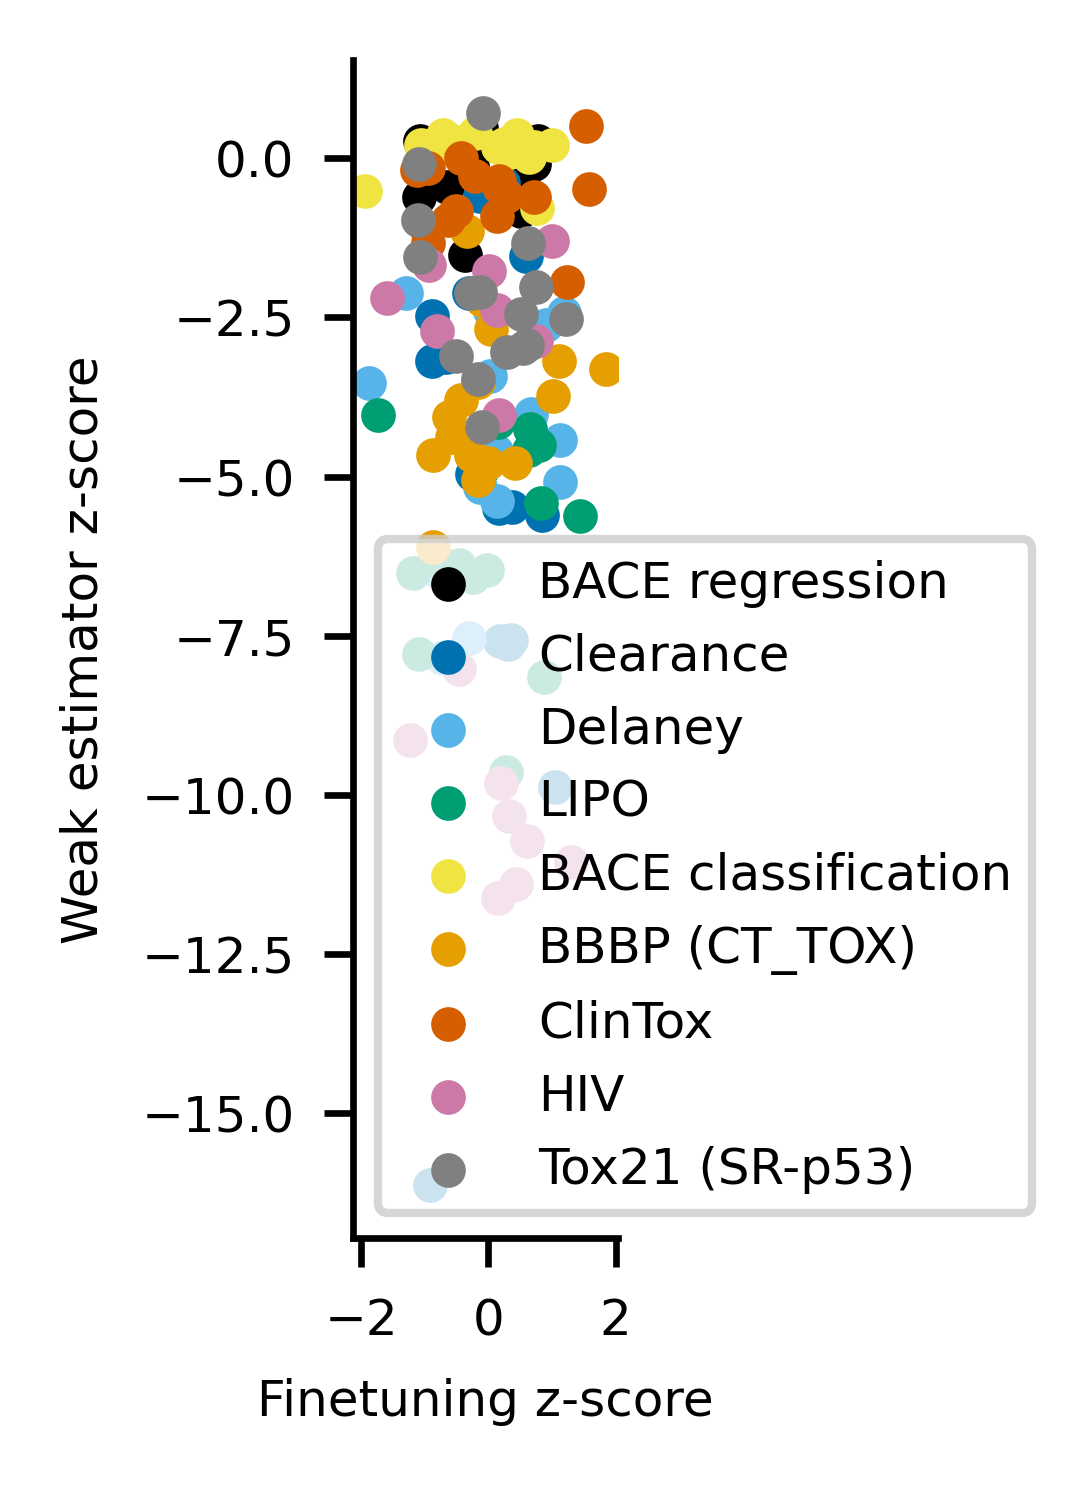

In [22]:
colours = ["#000000","#0072B2","#56B4E9","#009E73","#F0E442","#E69F00","#D55E00","#CC79A7","#808080"]
nicer_task_names = {"bace_classification":"BACE classification","bbbp":"BBBP (CT_TOX)","clintox":"ClinTox","hiv":"HIV","tox21":"Tox21 (SR-p53)","bace_regression": "BACE regression","clearance":"Clearance","delaney":"Delaney","lipo":"LIPO"}

cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(17.1*cm, 6*cm), dpi=600, layout='constrained')
plt.rcParams['font.size'] = 6

for it, task in enumerate(concat_regression.columns):
    mean, std = scaling_stats[task]
    weak = (-pd.Series(concat_regression.loc[:,:,:,:,"weak"][task])+mean)/std
    finetuning = (-pd.Series(concat_regression.loc[:,:,:,:,"finetuning"][task])+mean)/std
    plt.scatter(finetuning,weak,label=nicer_task_names[task], c=colours[it], s=10)

for it, task in enumerate(concat_classification.columns):
    mean, std = scaling_stats[task]
    weak = (pd.Series(concat_classification.loc[:,:,:,:,"weak"][task])-mean)/std
    finetuning = (pd.Series(concat_classification.loc[:,:,:,:,"finetuning"][task])-mean)/std
    plt.scatter(finetuning,weak, label=nicer_task_names[task], c=colours[it+len(concat_regression.columns)], s=10)

plt.gca().spines[['right', 'top', ]].set_visible(False)
plt.xlabel("Finetuning z-score")
plt.ylabel("Weak estimator z-score")
plt.legend()
plt.axis('scaled')
plt.savefig(PLOT_PATH/'weak_estimator_molnet.pdf', bbox_inches='tight',dpi=600, transparent=True)
plt.savefig(PLOT_PATH/'weak_estimator_molnet.png', bbox_inches='tight',dpi=600, transparent=True)
plt.show()